# Day 2: Daily, Monthly, Annual Returns

## Objective
Goal: Learn how to calculate daily, monthly, and annual returns, visualize return trends, and extract insights about performance and volatility that an analyst or portfolio manager would care about.

## Steps
1. Fetch stock data for the required time range.
2. Calculate simple and log **daily returns**.
3. Aggregate returns to **monthly** and **annual** frequencies.
4. Visualize daily returns and monthly returns using line/bar charts.
5. Derive **key statistics** such as average return, volatility, and annualized performance.

## Theory Recap
- **Returns** measure percentage change in asset prices, a key metric in evaluating performance.
- **Log returns** are additive over time and preferred for risk modeling.
- **Volatility (standard deviation of returns)** is a proxy for risk.
- **Business relevance:** Portfolio managers analyze returns over multiple timeframes (daily, monthly, annual) to assess performance, risk, and strategy effectiveness.


In [22]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

In [23]:

# Download data
ticker = "AAPL"
start_date = "2023-01-01"
end_date = "2024-07-26"
data = yf.download(ticker, start=start_date, end=end_date)

C:\Users\vedik\AppData\Local\Temp\ipykernel_12328\2133566187.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed


Daily Returns:
Price            Close Daily_Return Log_Return
Ticker            AAPL                        
Date                                          
2023-01-03  123.470604          NaN        NaN
2023-01-04  124.744118     0.010314   0.010261
2023-01-05  123.421242    -0.010605  -0.010661
2023-01-06  127.962433     0.036794   0.036133
2023-01-09  128.485641     0.004089   0.004080


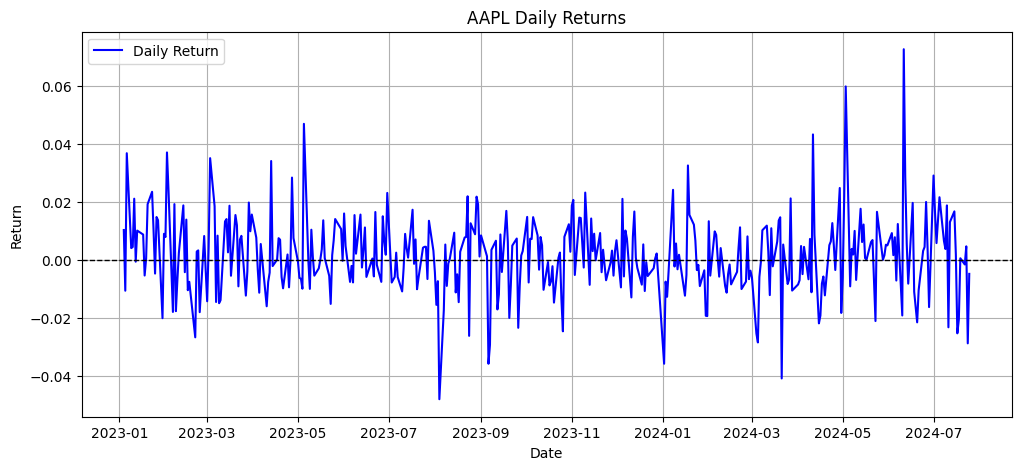

In [24]:
# -------------------------------
# 1. Calculate Daily Returns
# -------------------------------
data['Daily_Return'] = data['Close'].pct_change()
data['Log_Return'] = np.log(data['Close'] / data['Close'].shift(1))

print("Daily Returns:")
print(data[['Close', 'Daily_Return', 'Log_Return']].head())

# Plot daily returns
plt.figure(figsize=(12, 5))
plt.plot(data['Daily_Return'], label='Daily Return', color='blue')
plt.axhline(0, color='black', linewidth=1, linestyle='--')
plt.title(f'{ticker} Daily Returns')
plt.xlabel('Date')
plt.ylabel('Return')
plt.legend()
plt.grid(True)
plt.show()



C:\Users\vedik\AppData\Local\Temp\ipykernel_12328\1453187169.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_returns = data['Close'].resample('M').ffill().pct_change()



Monthly Returns:
Ticker          AAPL
Date                
2023-01-31       NaN
2023-02-28  0.023183
2023-03-31  0.118648
2023-04-30  0.028987
2023-05-31  0.046058


<Figure size 1200x500 with 0 Axes>

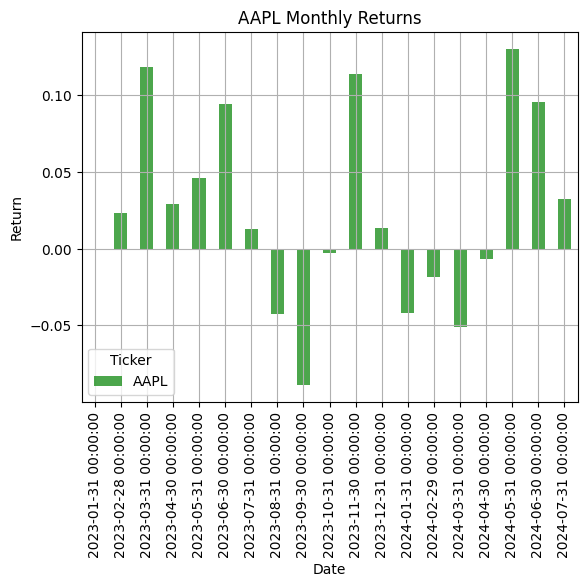

In [25]:
# -------------------------------
# 2. Monthly Returns
# -------------------------------
monthly_returns = data['Close'].resample('M').ffill().pct_change()
print("\nMonthly Returns:")
print(monthly_returns.head())

plt.figure(figsize=(12, 5))
monthly_returns.plot(kind='bar', color='green', alpha=0.7)
plt.title(f'{ticker} Monthly Returns')
plt.ylabel('Return')
plt.grid(True)
plt.show()


In [26]:

# -------------------------------
# 3. Annual Returns
# -------------------------------
annual_returns = data['Close'].resample('Y').ffill().pct_change()
print("\nAnnual Returns:")
print(annual_returns)



Annual Returns:
Ticker          AAPL
Date                
2023-12-31       NaN
2024-12-31  0.132618


C:\Users\vedik\AppData\Local\Temp\ipykernel_12328\3036390208.py:4: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  annual_returns = data['Close'].resample('Y').ffill().pct_change()


In [27]:

# -------------------------------
# 4. Key Statistics
# -------------------------------
avg_daily = data['Daily_Return'].mean()
vol_daily = data['Daily_Return'].std()
annualized_return = ((1 + avg_daily)**252 - 1)
annualized_volatility = vol_daily * np.sqrt(252)

print("\nKey Statistics:")
print(f"Average Daily Return: {avg_daily:.4%}")
print(f"Daily Volatility: {vol_daily:.4%}")
print(f"Annualized Return: {annualized_return:.4%}")
print(f"Annualized Volatility: {annualized_volatility:.4%}")


Key Statistics:
Average Daily Return: 0.1531%
Daily Volatility: 1.3766%
Annualized Return: 47.0395%
Annualized Volatility: 21.8521%
